In [1]:
import pandas as pd

In [2]:
reduced_train_df = pd.read_csv('../../flights_data/reduced_train_df.csv')
reduced_train_df.head()

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA_CODESHARE,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1
3,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,327,DL,...,San Jose,CA,1900-01-01 08:29:00,1900-01-01 10:25:00,N,296.0,1.0,2062.0,12.0,1
4,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,517,DL,...,Atlanta,GA,1900-01-01 18:54:00,1900-01-01 20:19:00,N,85.0,1.0,306.0,35.0,1


In [3]:
datetime_format = '%Y-%m-%d %H:%M:%S'
reduced_train_df['crs_dep_time'] = pd.to_datetime(reduced_train_df['crs_dep_time'], format=datetime_format)
h = reduced_train_df['crs_dep_time'].dt.hour
m = reduced_train_df['crs_dep_time'].dt.minute
s = reduced_train_df['crs_dep_time'].dt.second

In [4]:
reduced_train_df['crs_arr_time'] = pd.to_datetime(reduced_train_df['crs_arr_time'], format=datetime_format)
h_arr = reduced_train_df['crs_arr_time'].dt.hour
m = reduced_train_df['crs_arr_time'].dt.minute
s = reduced_train_df['crs_arr_time'].dt.second

In [5]:
reduced_train_df['crs_dep_time_hour'] = h
reduced_train_df['crs_arr_time_hour'] = h_arr

In [6]:
reduced_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fl_date             520681 non-null  object        
 1   year                520681 non-null  int64         
 2   month               520681 non-null  int64         
 3   day_of_week         520681 non-null  int64         
 4   day_name            520681 non-null  object        
 5   mkt_unique_carrier  520681 non-null  object        
 6   branded_code_share  520681 non-null  object        
 7   mkt_carrier         520681 non-null  object        
 8   mkt_carrier_fl_num  520681 non-null  int64         
 9   op_unique_carrier   520681 non-null  object        
 10  tail_num            520681 non-null  object        
 11  op_carrier_fl_num   520681 non-null  int64         
 12  origin_airport_id   520681 non-null  int64         
 13  origin              520681 no

In [7]:
df = reduced_train_df.drop(columns=[ 'fl_date','op_carrier_fl_num', 
'distance', 'flights', 'mkt_carrier', 'dest_city', 'branded_code_share', 
'crs_dep_time', 'crs_arr_time', 'dup', 'day_name', 'dest_state', 'origin_state'
,'origin_city','origin_city_name','dest_city_name', 'dest','origin', 'arr_delay',
'target_class', 'mkt_carrier_fl_num','tail_num'
])

In [22]:
df['crs_dep_time_hour'].unique()

array([ 6, 14, 17,  8, 18,  7, 22, 21,  5, 19, 16, 10, 20, 12,  9, 13, 15,
       11, 23,  2,  1,  3,  0,  4])

In [9]:
cat_vars = ['year', 'month', 'day_of_week', 'mkt_unique_carrier','origin_airport_id',
       'dest_airport_id', 'op_unique_carrier', 'crs_dep_time_hour', 'crs_arr_time_hour']

In [10]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1


df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [11]:
data_final=df[to_keep]
data_final.columns.values

array(['crs_elapsed_time', 'year_2018', 'year_2019', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'mkt_unique_carrier_AA',
       'mkt_unique_carrier_AS', 'mkt_unique_carrier_B6',
       'mkt_unique_carrier_DL', 'mkt_unique_carrier_F9',
       'mkt_unique_carrier_G4', 'mkt_unique_carrier_HA',
       'mkt_unique_carrier_NK', 'mkt_unique_carrier_UA',
       'mkt_unique_carrier_VX', 'mkt_unique_carrier_WN',
       'origin_airport_id_10135', 'origin_airport_id_10136',
       'origin_airport_id_10140', 'origin_airport_id_10141',
       'origin_airport_id_10146', 'origin_airport_id_10154',
       'origin_airport_id_10155', 'origin_airport_id_10157',
       'origin_airport_id_10158', 'origin_airport_id_10165',
       'origin_airport_id_10170', 'origin_airport_

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np
data_final['crs_elapsed_time'] = StandardScaler().fit_transform(np.array(data_final['crs_elapsed_time']).reshape(-1, 1))

/var/folders/tk/cjz8vl_s0wnbtvbhl4lhp3lr0000gn/T/ipykernel_14795/3322379569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['crs_elapsed_time'] = StandardScaler().fit_transform(np.array(data_final['crs_elapsed_time']).reshape(-1, 1))


In [13]:
X = data_final
y = reduced_train_df['target_class']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

logreg_accuracy = logreg.score(X_test, y_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_accuracy))


/Users/siyumao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of logistic regression classifier on test set: 0.58


In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=6, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accuracy = rfc.score(X_test, y_test)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc_accuracy))

Accuracy of random forest classifier on test set: 0.57


<Figure size 2400x960 with 0 Axes>

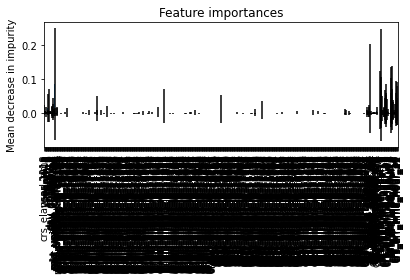

In [16]:
import matplotlib.pyplot as plt
importances = rfc.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

from matplotlib.pyplot import figure
figure(figsize=(30, 12), dpi=80)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_accuracy = nb.score(X_test, y_test)

print("Naive Bayes score: ",nb_accuracy)

Naive Bayes score:  0.5142648626328779


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DTclf = DecisionTreeClassifier()
DT = DTclf.fit(X_train,y_train)
y_pred = DTclf.predict(X_test)

# # evaluate predictions
DT_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", DT_accuracy)

Accuracy: 0.5475863525932185


In [19]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# xgb = XGBClassifier()

# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)

# # evaluate predictions
# xgb_accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", xgb_accuracy)

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(learning_rate=0.1, objective= 'binary:logistic',
 n_estimators=100)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# evaluate predictions
xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_accuracy)



[01:23:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

#### Classification Summary

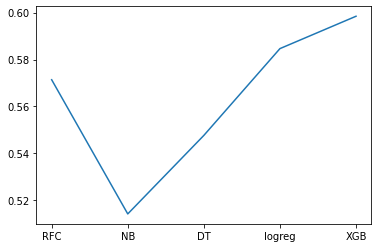

In [ ]:
# libraries
import matplotlib.pyplot as plt

models = ['RFC', 'NB','DT','logreg', 'XGB']
results = [rfc_accuracy, nb_accuracy, DT_accuracy, logreg_accuracy, xgb_accuracy]


# plot model performance for comparison
plt.plot(models, results)
plt.show()

In [1]:
import gc
collected = gc.collect()
print("Garbage collector: collected", 
          "%d objects." % collected) 

Garbage collector: collected 149 objects.
